<a href="https://colab.research.google.com/github/PragyaAnanth/DLBanknoteRecogModel/blob/main/Pragya_CaseStudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **18CS402 - Deep Learning Lab**
19th November 2021
# **Case Study Final Evaluation**

**Faculty:** <br>
Ms. Aarthi R <br>
Assistant Professor <br>
Department of Computer Science and Engineering<br>
Amrita School of Engineering Coimbatore <br>
<br>

**Student Details:** 
### **Pragya Ananth**
### **CB.SC.I5DAS18027**
Integrated M.Sc. Data Science <br>

# *Case Study topic*: **Deep Learning in Banking and Finance**
## *Research Paper topic*:
### **Deep Learning Approach Combining Lightweight CNN Architecture with Transfer Learning: An Automatic Approach for the Detection and Recognition of Bangladeshi Banknotes**

## Mounting, Library imports, Data import

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
#importing the models
from tensorflow.keras.applications import mobilenet
#Initialising the model
#mobilenet_model = mobilenet.MobileNet(weights='imagenet')

import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.imagenet_utils import decode_predictions

In [ ]:
from tensorflow.keras.applications.mobilenet import MobileNet
from keras.layers import Dense,GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.mobilenet import preprocess_input
import keras
from keras.preprocessing import image

## MobileNet Modelling

### Architecture 1: Basic

In [ ]:
base_model=MobileNet(weights='imagenet',include_top=False) #imports the mobilenet model and discards the last 1000 neuron layer.

x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dense(1024,activation='relu')(x) #dense layer 2
x=Dense(512,activation='relu')(x) #dense layer 3
preds=Dense(9,activation='softmax')(x) #final layer with softmax activation

In [ ]:
model=Model(inputs=base_model.input,outputs=preds)
#specify the inputs
#specify the outputs
#now a model has been created based on our architecture

In [ ]:
for i,layer in enumerate(model.layers):
  print(i,layer.name)

0 input_2
1 conv1
2 conv1_bn
3 conv1_relu
4 conv_dw_1
5 conv_dw_1_bn
6 conv_dw_1_relu
7 conv_pw_1
8 conv_pw_1_bn
9 conv_pw_1_relu
10 conv_pad_2
11 conv_dw_2
12 conv_dw_2_bn
13 conv_dw_2_relu
14 conv_pw_2
15 conv_pw_2_bn
16 conv_pw_2_relu
17 conv_dw_3
18 conv_dw_3_bn
19 conv_dw_3_relu
20 conv_pw_3
21 conv_pw_3_bn
22 conv_pw_3_relu
23 conv_pad_4
24 conv_dw_4
25 conv_dw_4_bn
26 conv_dw_4_relu
27 conv_pw_4
28 conv_pw_4_bn
29 conv_pw_4_relu
30 conv_dw_5
31 conv_dw_5_bn
32 conv_dw_5_relu
33 conv_pw_5
34 conv_pw_5_bn
35 conv_pw_5_relu
36 conv_pad_6
37 conv_dw_6
38 conv_dw_6_bn
39 conv_dw_6_relu
40 conv_pw_6
41 conv_pw_6_bn
42 conv_pw_6_relu
43 conv_dw_7
44 conv_dw_7_bn
45 conv_dw_7_relu
46 conv_pw_7
47 conv_pw_7_bn
48 conv_pw_7_relu
49 conv_dw_8
50 conv_dw_8_bn
51 conv_dw_8_relu
52 conv_pw_8
53 conv_pw_8_bn
54 conv_pw_8_relu
55 conv_dw_9
56 conv_dw_9_bn
57 conv_dw_9_relu
58 conv_pw_9
59 conv_pw_9_bn
60 conv_pw_9_relu
61 conv_dw_10
62 conv_dw_10_bn
63 conv_dw_10_relu
64 conv_pw_10
65 conv_pw_1

In [ ]:
for layer in model.layers:
    layer.trainable=False
# or if we want to set the first 20 layers of the network to be non-trainable
for layer in model.layers[:20]:
    layer.trainable=False
for layer in model.layers[20:]:
    layer.trainable=True

In [ ]:
train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input) #included in our dependencies

train_generator=train_datagen.flow_from_directory('/content/drive/MyDrive/18CSC402_DL_Lab/CaseStudy/Bangla Money/Training',
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=True)

Found 1637 images belonging to 9 classes.


In [ ]:

model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Adam optimizer
# loss function will be categorical cross entropy
# evaluation metric will be accuracy

#step_size_train=train_generator.n//train_generator.batch_size
step_size_train=10
model.fit_generator(generator=train_generator,
                   steps_per_epoch=step_size_train,
                   epochs=10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  # This is added back by InteractiveShellApp.init_path()


Epoch 1/10
10/10 [==============================] - 21s 2s/step - loss: 0.2014 - accuracy: 0.9438
Epoch 2/10
10/10 [==============================] - 24s 2s/step - loss: 0.3836 - accuracy: 0.9249
Epoch 3/10
10/10 [==============================] - 20s 2s/step - loss: 0.3521 - accuracy: 0.8969
Epoch 4/10
10/10 [==============================] - 8s 831ms/step - loss: 0.1882 - accuracy: 0.9454
Epoch 5/10
10/10 [==============================] - 9s 920ms/step - loss: 0.0824 - accuracy: 0.9781
Epoch 6/10
10/10 [==============================] - 10s 907ms/step - loss: 0.0578 - accuracy: 0.9898
Epoch 7/10
10/10 [==============================] - 7s 662ms/step - loss: 0.1772 - accuracy: 0.9625
Epoch 8/10
10/10 [==============================] - 6s 636ms/step - loss: 0.1349 - accuracy: 0.9656
Epoch 9/10
10/10 [==============================] - 4s 415ms/step - loss: 0.2290 - accuracy: 0.9454
Epoch 10/10
10/10 [==============================] - 4s 418ms/step - loss: 0.2736 - accuracy: 0.9344


### Architecture 2: Paper's parameters

In [ ]:
base_model=MobileNet(weights='imagenet',include_top=False) #imports the mobilenet model and discards the last 1000 neuron layer.

x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) 
x=Dense(512,activation='relu')(x) #dense layer 2
x=Dense(512,activation='relu')(x) #dense layer 3
x=Dense(256,activation='relu')(x) #dense layer 3
x=Dense(128,activation='relu')(x) #dense layer 3
preds=Dense(9,activation='softmax')(x) #final layer with softmax activation

In [ ]:
model=Model(inputs=base_model.input,outputs=preds)
#specify the inputs
#specify the outputs
#now a model has been created based on our architecture

In [ ]:
for i,layer in enumerate(model.layers):
  print(i,layer.name)

0 input_3
1 conv1
2 conv1_bn
3 conv1_relu
4 conv_dw_1
5 conv_dw_1_bn
6 conv_dw_1_relu
7 conv_pw_1
8 conv_pw_1_bn
9 conv_pw_1_relu
10 conv_pad_2
11 conv_dw_2
12 conv_dw_2_bn
13 conv_dw_2_relu
14 conv_pw_2
15 conv_pw_2_bn
16 conv_pw_2_relu
17 conv_dw_3
18 conv_dw_3_bn
19 conv_dw_3_relu
20 conv_pw_3
21 conv_pw_3_bn
22 conv_pw_3_relu
23 conv_pad_4
24 conv_dw_4
25 conv_dw_4_bn
26 conv_dw_4_relu
27 conv_pw_4
28 conv_pw_4_bn
29 conv_pw_4_relu
30 conv_dw_5
31 conv_dw_5_bn
32 conv_dw_5_relu
33 conv_pw_5
34 conv_pw_5_bn
35 conv_pw_5_relu
36 conv_pad_6
37 conv_dw_6
38 conv_dw_6_bn
39 conv_dw_6_relu
40 conv_pw_6
41 conv_pw_6_bn
42 conv_pw_6_relu
43 conv_dw_7
44 conv_dw_7_bn
45 conv_dw_7_relu
46 conv_pw_7
47 conv_pw_7_bn
48 conv_pw_7_relu
49 conv_dw_8
50 conv_dw_8_bn
51 conv_dw_8_relu
52 conv_pw_8
53 conv_pw_8_bn
54 conv_pw_8_relu
55 conv_dw_9
56 conv_dw_9_bn
57 conv_dw_9_relu
58 conv_pw_9
59 conv_pw_9_bn
60 conv_pw_9_relu
61 conv_dw_10
62 conv_dw_10_bn
63 conv_dw_10_relu
64 conv_pw_10
65 conv_pw_1

In [ ]:
#for layer in model.layers:
#    layer.trainable=False
# or if we want to set the first 20 layers of the network to be non-trainable
#for layer in model.layers[:20]:
#    layer.trainable=False
#for layer in model.layers[20:]:
#    layer.trainable=True
for layer in model.layers:
    layer.trainable=True

In [ ]:
train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input) #included in our dependencies

train_generator=train_datagen.flow_from_directory('/content/drive/MyDrive/18CSC402_DL_Lab/CaseStudy/Bangla Money/Training',
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=True)

Found 1637 images belonging to 9 classes.


In [ ]:

model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Adam optimizer
# loss function will be categorical cross entropy
# evaluation metric will be accuracy

step_size_train=train_generator.n//train_generator.batch_size
#step_size_train=10
model.fit_generator(generator=train_generator,
                   steps_per_epoch=step_size_train,
                   epochs=50)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  # This is added back by InteractiveShellApp.init_path()


Epoch 1/50
51/51 [==============================] - 22s 352ms/step - loss: 0.4020 - accuracy: 0.8941
Epoch 2/50
51/51 [==============================] - 16s 313ms/step - loss: 0.2128 - accuracy: 0.9495
Epoch 3/50
51/51 [==============================] - 16s 314ms/step - loss: 0.1202 - accuracy: 0.9738
Epoch 4/50
51/51 [==============================] - 16s 314ms/step - loss: 0.1875 - accuracy: 0.9676
Epoch 5/50
51/51 [==============================] - 16s 312ms/step - loss: 0.1426 - accuracy: 0.9595
Epoch 6/50
51/51 [==============================] - 16s 313ms/step - loss: 0.1291 - accuracy: 0.9782
Epoch 7/50
51/51 [==============================] - 16s 315ms/step - loss: 0.0847 - accuracy: 0.9801
Epoch 8/50
51/51 [==============================] - 16s 313ms/step - loss: 0.1011 - accuracy: 0.9763
Epoch 9/50
51/51 [==============================] - 16s 312ms/step - loss: 0.0979 - accuracy: 0.9819
Epoch 10/50
51/51 [==============================] - 16s 313ms/step - loss: 0.0987 - accura

Predicting test data

In [ ]:
def load_image(img_path, show=False):

    img = image.load_img(img_path, target_size=(224, 224))
    img_tensor = image.img_to_array(img)                    # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor /= 255.                                      # imshow expects values in the range [0, 1]

    if show:
        plt.imshow(img_tensor[0])                           
        plt.axis('off')
        plt.show()

    return img_tensor

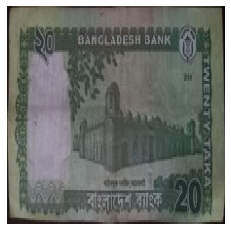

array([[0.08642912, 0.08806369, 0.13315281, 0.1162652 , 0.14727075,
        0.12648919, 0.0777991 , 0.08754455, 0.13698556]], dtype=float32)

In [ ]:
img_path = '/content/drive/MyDrive/18CSC402_DL_Lab/CaseStudy/Bangla Money/Testing/314.jpg'
new_image = load_image(img_path,True)

pred = model.predict(new_image)

pred

In [ ]:
classes = np.argmax(pred, axis = 1)
print(classes)

[4]
